In [4]:
from skimage import io

from matplotlib import pyplot as plt

import os
import scipy
import numpy as np

from glob import glob

In [6]:
ls ../../

H0_0000.tif*  H6_0003.tif*  S4_0005.tif*  d3_0002.tif*  v1_0004.tif*
H0_0001.tif*  H6_0004.tif*  S5_0000.tif*  d3_0003.tif*  v1_0005.tif*
H0_0002.tif*  H6_0005.tif*  S5_0001.tif*  d3_0004.tif*  v2_0000.tif*
H0_0003.tif*  H7_0000.tif*  S5_0002.tif*  d3_0005.tif*  v2_0001.tif*
H0_0004.tif*  H7_0001.tif*  S5_0003.tif*  d4_0000.tif*  v2_0002.tif*
H0_0005.tif*  H7_0002.tif*  S5_0004.tif*  d4_0001.tif*  v2_0003.tif*
H0_0006.tif*  H7_0003.tif*  S5_0005.tif*  d4_0002.tif*  v2_0004.tif*
H1_0000.tif*  H7_0004.tif*  S6_0000.tif*  d4_0003.tif*  v2_0005.tif*
H1_0001.tif*  H7_0005.tif*  S6_0001.tif*  d4_0004.tif*  v3_0000.tif*
H1_0002.tif*  LVScripts/    S6_0002.tif*  d4_0005.tif*  v3_0001.tif*
H1_0003.tif*  S0_0000.tif*  S6_0003.tif*  d5_0000.tif*  v3_0002.tif*
H1_0004.tif*  S0_0001.tif*  S6_0004.tif*  d5_0001.tif*  v3_0003.tif*
H1_0005.tif*  S0_0002.tif*  S6_0005.tif*  d5_0002.tif*  v3_0004.tif*
H2_0000.tif*  S0_0003.tif*  S7_0000.tif*  d5_0003.tif*  v3_0005.tif*
H2_0001.tif*  S0_0004.tif*  S7_000

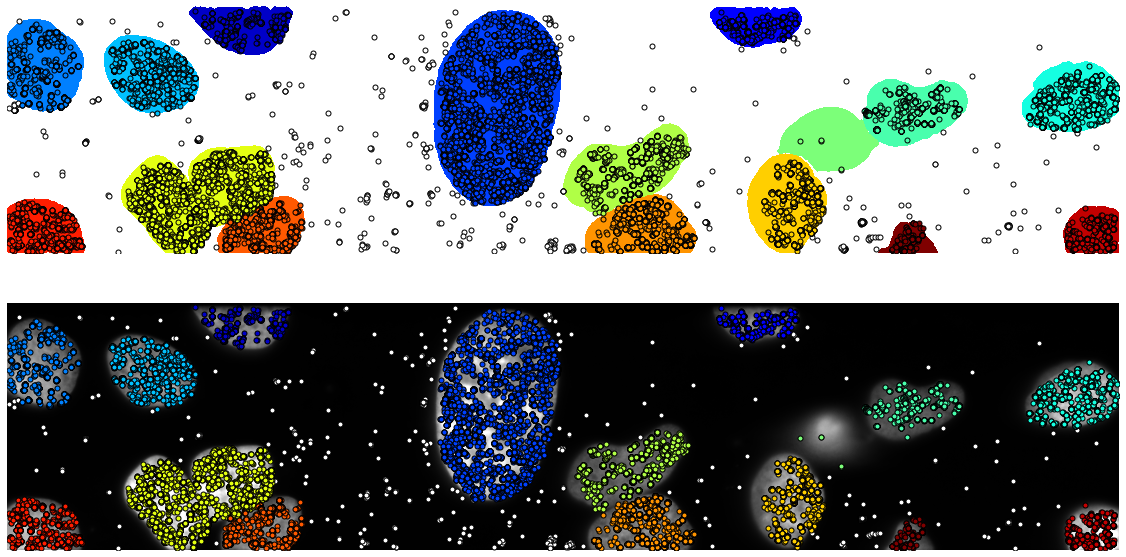

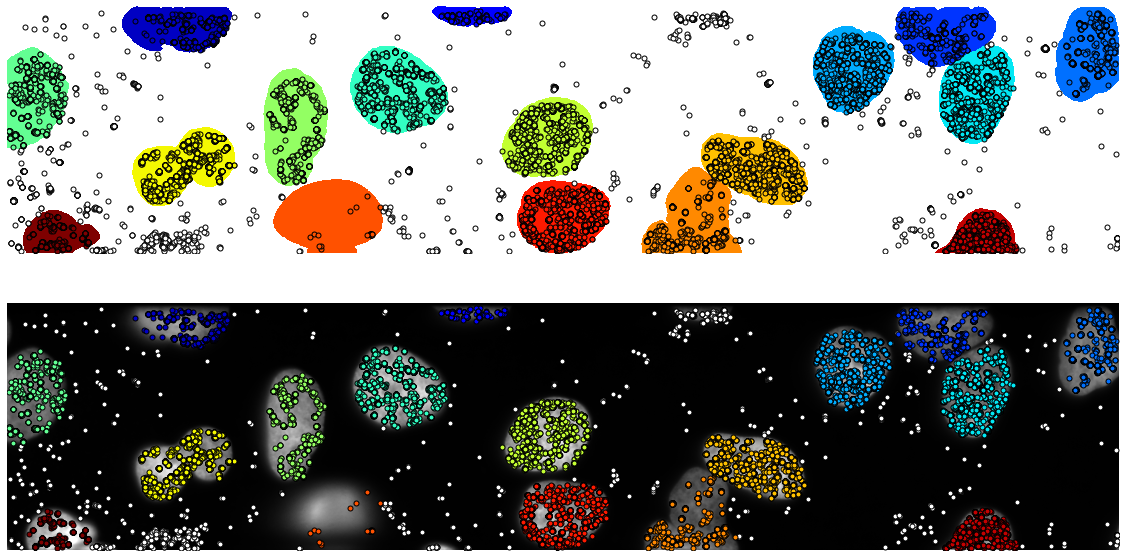

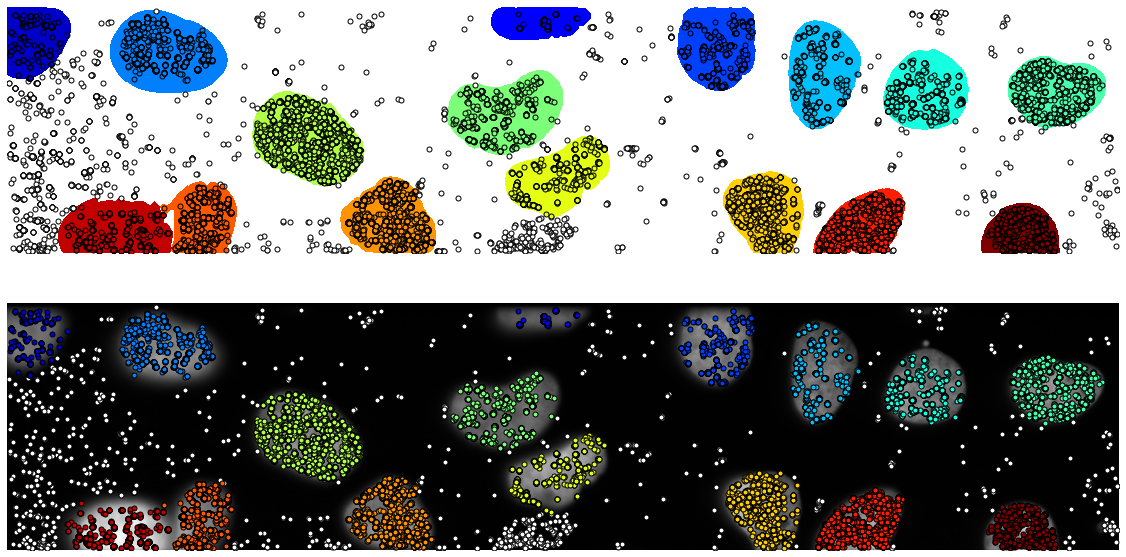

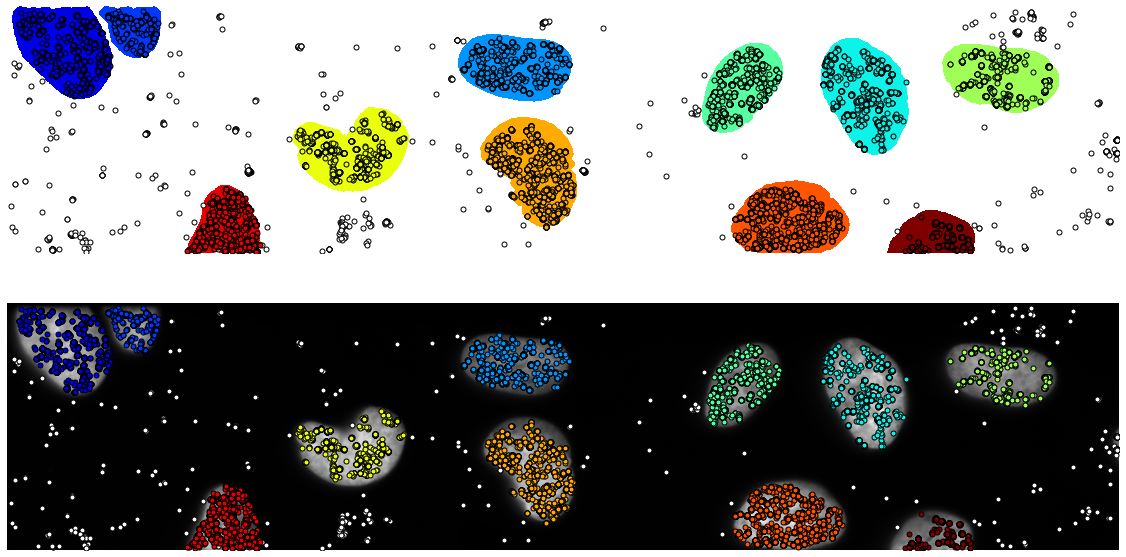

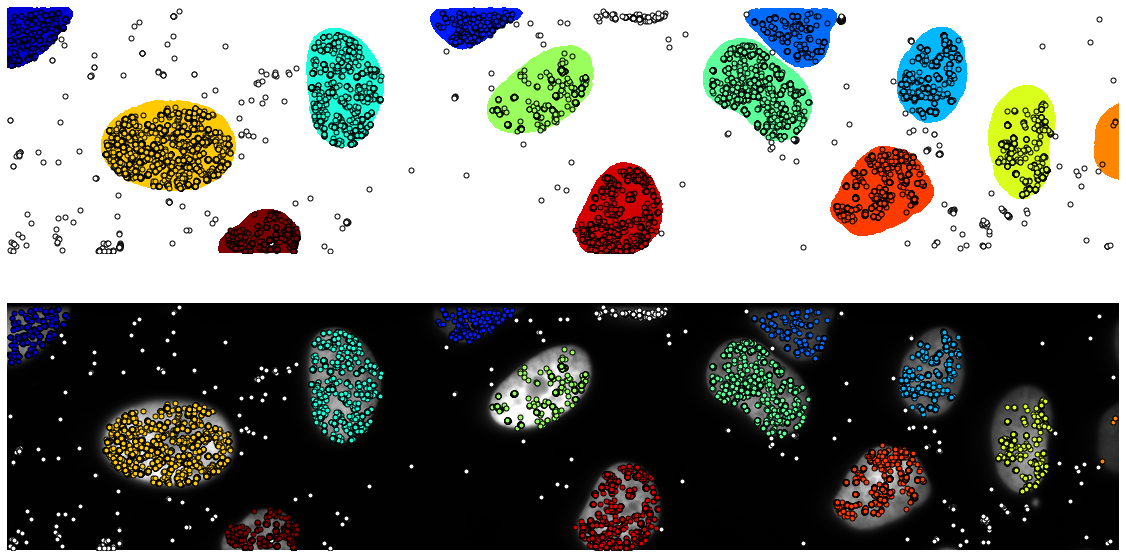

In [15]:
from matplotlib import colors

# Choose a colormap
# cmap = plt.cm.viridis
cmap = plt.cm.jet

# Modify the colormap to set zero values to white
cmap_modified = cmap(np.arange(cmap.N))  # Extract original colormap colors
cmap_modified[0, :] = np.array([1, 1, 1, 1])  # Set the first color to white (RGBA)

# Create a new colormap with the modified zero value
new_cmap = colors.ListedColormap(cmap_modified)


for n in range(5):
    fig,axs = plt.subplots(2,1,figsize=(20,10))
    
    masktif = f'masks/H0_{n:04d}.tif'
    rawtif = f'../../H0_{n:04d}.tif'
    
    im = io.imread(masktif)
    rawim = io.imread(rawtif)
    
    implot = axs[0].imshow(im,cmap=new_cmap,interpolation='nearest')
    mapnorm = implot.norm
    
    rawimplot = axs[1].imshow(rawim,cmap='gray')

    base_traj_fname = f'sorted_trajectories/d0_{n:04d}_trajs/'
    nfiles = len(glob(base_traj_fname + "*csv"))
    for j in range(0,nfiles+1):
        try:
            a = np.genfromtxt(f'{base_traj_fname}/{j}.csv',delimiter=',',skip_header=1)    
        except:
            continue
        if a.size==20:
            continue
        axs[0].plot(a[:,1],a[:,0],'.',markerfacecolor=new_cmap(mapnorm(j)),markeredgecolor='k',markersize=10)
        axs[1].plot(a[:,1],a[:,0],'.',markerfacecolor=new_cmap(mapnorm(j)),markeredgecolor='k',markersize=10)
    axs[0].axis('off')
    axs[1].axis('off')
